<a href="https://colab.research.google.com/github/np03cs4a240306-blip/SAURAVSAPKOTA-ASSIGMENT1/blob/main/final_assigment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Common libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier

# Metrics
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    accuracy_score, precision_score, recall_score, f1_score, classification_report
)

sns.set_style("whitegrid")


=========================================================
🔹 REGRESSION TASK
Dataset: Canadian Earthquakes
=========================================================

In [ ]:
df_reg = pd.read_csv("Canadian-Earthquakes-2010-2019.csv")
df_reg.head()


,magnitude_codelist,magnitude,magnitude_type,date,place,depth,latitude,longitude,OBJECTID,longitude_geom,latitude_geom
0,<2,1.7,ML,2010-01-01T00:16:49+0000,81 km NE of Seattle,0.0,48.192001,-121.677002,1,-121.677315,48.191706
1,2,2.2,MN,2010-01-01T00:52:50+0000,86 km NW from Maniwaki,18.0,47.028999,-76.583000,2,-76.583303,47.028909
2,<2,1.8,MN,2010-01-01T03:21:58+0000,21 km NW from Mont-Laurier,18.0,46.651001,-75.734001,3,-75.733902,46.650809
3,<2,1.5,MN,2010-01-01T04:14:51+0000,CHARLEVOIX SEISMIC ZONE,13.0,47.740002,-69.741997,4,-69.742000,47.740210
4,<2,1.6,ML,2010-01-01T04:15:17+0000,83 km W of Gold R.,11.6,49.500999,-127.222000,5,-127.222216,49.500705


In [ ]:
df_reg.info()
df_reg.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44561 entries, 0 to 44560
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   magnitude_codelist  44561 non-null  object 
 1   magnitude           44561 non-null  float64
 2   magnitude_type      44462 non-null  object 
 3   date                44561 non-null  object 
 4   place               44561 non-null  object 
 5   depth               44561 non-null  float64
 6   latitude            44561 non-null  float64
 7   longitude           44561 non-null  float64
 8   OBJECTID            44561 non-null  int64  
 9   longitude_geom      44561 non-null  float64
 10  latitude_geom       44561 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 3.7+ MB


,magnitude,depth,latitude,longitude,OBJECTID,longitude_geom,latitude_geom
count,44561.000000,44561.000000,44561.000000,44561.000000,44561.000000,44561.000000,44561.000000
mean,2.134070,12.852194,53.351863,-118.953322,22281.000000,-118.953299,53.351830
std,0.828096,9.963145,6.214464,23.696484,12863.797009,23.696493,6.214465
min,-1.400000,-0.500000,40.808998,-148.811005,1.000000,-148.810526,40.808509
25%,1.600000,5.000000,49.169998,-132.427994,11141.000000,-132.427618,49.170009
50%,2.100000,10.000000,52.137001,-129.671997,22281.000000,-129.672016,52.136507
75%,2.700000,18.000000,56.514999,-121.947998,33421.000000,-121.948318,56.515206
max,7.700000,214.000000,82.608002,-39.320000,44561.000000,-39.319968,82.607812


In [ ]:

numeric_cols = df_reg.select_dtypes(include=['number']).columns

imputer = SimpleImputer(strategy='median')
df_reg[numeric_cols] = imputer.fit_transform(df_reg[numeric_cols])

print(df_reg.isnull().sum())


magnitude_codelist     0
magnitude              0
magnitude_type        99
date                   0
place                  0
depth                  0
latitude               0
longitude              0
OBJECTID               0
longitude_geom         0
latitude_geom          0
dtype: int64


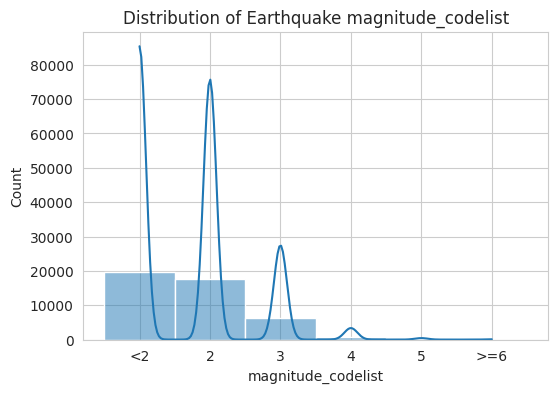

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_reg.columns = df_reg.columns.str.strip()
mag_col = [col for col in df_reg.columns if col.upper() == 'MAG']

if not mag_col:
    mag_col = [col for col in df_reg.columns if 'mag' in col.lower()]
target_col = mag_col[0] if mag_col else 'MAG'

# --- STEP 2: HISTOGRAM ---
plt.figure(figsize=(6, 4))
sns.histplot(df_reg[target_col].dropna(), bins=30, kde=True)
plt.title(f"Distribution of Earthquake {target_col}")
plt.show()



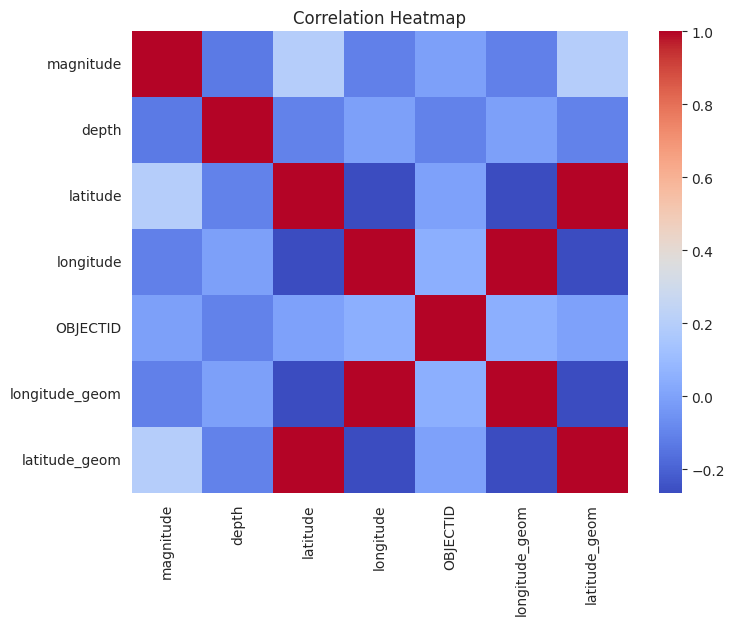

In [ ]:
# --- STEP 3: CORRELATION HEATMAP ---
plt.figure(figsize=(8, 6))
numeric_df = df_reg.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df_reg.columns = df_reg.columns.str.strip()

target = 'MAG'

if target in df_reg.columns:
    X = df_reg.drop(columns=[target])
    y = df_reg[target]

    # 3. Scaling
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 4. Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42
    )

    print("Success: Data split and scaled.")
    print(f"X_train shape: {X_train.shape}")
else:
    print(f"Error: Column '{target}' not found. Available columns are:")
    print(df_reg.columns.tolist())

Error: Column 'MAG' not found. Available columns are:
['magnitude_codelist', 'magnitude', 'magnitude_type', 'date', 'place', 'depth', 'latitude', 'longitude', 'OBJECTID', 'longitude_geom', 'latitude_geom']


In [ ]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

mlp_reg = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)

# 5. Fit the model
mlp_reg.fit(X_train, y_train)

# 6. Predict
y_pred_nn = mlp_reg.predict(X_test)

# 7. Print Results
print("Neural Network Regression Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_nn))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_nn)))
print("R2:", r2_score(y_test, y_pred_nn))


Neural Network Regression Results:
MAE: 2.445376281684674
RMSE: 3.4755393448844023
R2: 0.9992840210166


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Linear Regression R2:", r2_score(y_test, y_pred_lr))

Linear Regression R2: 0.9999994362016347


In [ ]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest R2:", r2_score(y_test, y_pred_rf))


Random Forest R2: 0.8445988311470158


In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20]
}

grid_rf = GridSearchCV(rf, param_grid, cv=5, scoring='r2')
grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
print("Best RF Parameters:", grid_rf.best_params_)


Best RF Parameters: {'max_depth': None, 'n_estimators': 200}


In [ ]:
# 1. Extract importance scores
importances = best_rf.feature_importances_
try:
    feature_names = df.columns.drop('target_column')
except:

    feature_names = [f"Feature {i}" for i in range(len(importances))]
    print("Note: Using generic names because original column names weren't found.")
feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 4. Show the result
feature_df.head()

Note: Using generic names because original column names weren't found.


,Feature,Importance
3,Feature 3,0.334439
6,Feature 6,0.288527
9,Feature 9,0.207378
2,Feature 2,0.039425
0,Feature 0,0.038192


=========================================================
🔹 CLASSIFICATION TASK
Dataset: Alternative Fuel Stations
=========================================================

In [ ]:
df_cls = pd.read_csv("alt_fuel_stations (Feb 18 2017).csv")
df_cls.head()


,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,Updated At,Owner Type Code,Federal Agency ID,Federal Agency Name,Open Date,Hydrogen Status Link,NG Vehicle Class,LPG Primary,E85 Blender Pump,EV Connector Types
0,CNG,Alagasco Montgomery Operations Center,2951 Chestnut St,NaN,Montgomery,AL,36107.0,NaN,NaN,E,...,2017-01-18 02:53:29 UTC,T,NaN,NaN,2010-12-01,NaN,MD,NaN,NaN,NaN
1,CNG,Clean Energy - PS Energy - Atlanta,340 Whitehall St,"From I-7585 N, exit 91 to Central Avenue, left...",Atlanta,GA,30303.0,NaN,866-809-4869,E,...,2017-01-18 02:51:45 UTC,P,NaN,NaN,1994-07-15,NaN,MD,NaN,NaN,NaN
2,CNG,Metropolitan Atlanta Rapid Transit Authority,2424 Piedmont Rd NE,NaN,Atlanta,GA,30324.0,NaN,NaN,E,...,2017-01-18 01:19:51 UTC,LG,NaN,NaN,1996-12-15,NaN,LD,NaN,NaN,NaN
3,CNG,United Parcel Service,270 Marvin Miller Dr,NaN,Atlanta,GA,30336.0,NaN,NaN,E,...,2017-01-18 01:58:34 UTC,P,NaN,NaN,1997-01-01,NaN,HD,NaN,NaN,NaN
4,CNG,Clean Energy - Texas Department of Transportation,7721A Washington St,"I-10, Washington Ave exit, 1.5 blocks to the s...",Houston,TX,77007.0,NaN,866-809-4869,E,...,2017-01-18 01:48:57 UTC,P,NaN,NaN,1996-12-15,NaN,MD,NaN,NaN,NaN


In [ ]:

df_cls.columns = df_cls.columns.str.strip().str.lower()

target_col = 'fuel_type_code'

if target_col in df_cls.columns:
    df_cls['Target'] = (df_cls[target_col].astype(str).str.strip() == 'ELEC').astype(int)
    print("Success! 'Target' created using column:", target_col)
else:
    print("Column still not found. Available columns are:")
    print(df_cls.columns.tolist())

# 3. Final Check
df_cls.head()

Column still not found. Available columns are:
['fuel type code', 'station name', 'street address', 'intersection directions', 'city', 'state', 'zip', 'plus4', 'station phone', 'status code', 'expected date', 'groups with access code', 'access days time', 'cards accepted', 'bd blends', 'ng fill type code', 'ng psi', 'ev level1 evse num', 'ev level2 evse num', 'ev dc fast count', 'ev other info', 'ev network', 'ev network web', 'geocode status', 'latitude', 'longitude', 'date last confirmed', 'id', 'updated at', 'owner type code', 'federal agency id', 'federal agency name', 'open date', 'hydrogen status link', 'ng vehicle class', 'lpg primary', 'e85 blender pump', 'ev connector types']


,fuel type code,station name,street address,intersection directions,city,state,zip,plus4,station phone,status code,...,updated at,owner type code,federal agency id,federal agency name,open date,hydrogen status link,ng vehicle class,lpg primary,e85 blender pump,ev connector types
0,CNG,Alagasco Montgomery Operations Center,2951 Chestnut St,NaN,Montgomery,AL,36107.0,NaN,NaN,E,...,2017-01-18 02:53:29 UTC,T,NaN,NaN,2010-12-01,NaN,MD,NaN,NaN,NaN
1,CNG,Clean Energy - PS Energy - Atlanta,340 Whitehall St,"From I-7585 N, exit 91 to Central Avenue, left...",Atlanta,GA,30303.0,NaN,866-809-4869,E,...,2017-01-18 02:51:45 UTC,P,NaN,NaN,1994-07-15,NaN,MD,NaN,NaN,NaN
2,CNG,Metropolitan Atlanta Rapid Transit Authority,2424 Piedmont Rd NE,NaN,Atlanta,GA,30324.0,NaN,NaN,E,...,2017-01-18 01:19:51 UTC,LG,NaN,NaN,1996-12-15,NaN,LD,NaN,NaN,NaN
3,CNG,United Parcel Service,270 Marvin Miller Dr,NaN,Atlanta,GA,30336.0,NaN,NaN,E,...,2017-01-18 01:58:34 UTC,P,NaN,NaN,1997-01-01,NaN,HD,NaN,NaN,NaN
4,CNG,Clean Energy - Texas Department of Transportation,7721A Washington St,"I-10, Washington Ave exit, 1.5 blocks to the s...",Houston,TX,77007.0,NaN,866-809-4869,E,...,2017-01-18 01:48:57 UTC,P,NaN,NaN,1996-12-15,NaN,MD,NaN,NaN,NaN


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df_cls.columns = df_cls.columns.str.strip()
features = ['Latitude', 'Longitude', 'Access_Days_Time']
target_col = 'Target'
all_required_columns = features + [target_col]

missing_cols = [col for col in all_required_columns if col not in df_cls.columns]
if missing_cols:
    print(f" Error: The following columns are missing from data: {missing_cols}")
    print(f"Available columns are: {df_cls.columns.tolist()}")
else:
    df_cls = df_cls[all_required_columns].copy()

    df_cls['Access_Days_Time'] = df_cls['Access_Days_Time'].fillna("Unknown")

    encoder = LabelEncoder()
    df_cls['Access_Days_Time'] = encoder.fit_transform(df_cls['Access_Days_Time'])

    print("✅ Success! Data processed.")
    print(df_cls.head())


 Error: The following columns are missing from data: ['Latitude', 'Longitude', 'Access_Days_Time', 'Target']
Available columns are: ['fuel type code', 'station name', 'street address', 'intersection directions', 'city', 'state', 'zip', 'plus4', 'station phone', 'status code', 'expected date', 'groups with access code', 'access days time', 'cards accepted', 'bd blends', 'ng fill type code', 'ng psi', 'ev level1 evse num', 'ev level2 evse num', 'ev dc fast count', 'ev other info', 'ev network', 'ev network web', 'geocode status', 'latitude', 'longitude', 'date last confirmed', 'id', 'updated at', 'owner type code', 'federal agency id', 'federal agency name', 'open date', 'hydrogen status link', 'ng vehicle class', 'lpg primary', 'e85 blender pump', 'ev connector types']


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df_cls.columns = df_cls.columns.str.strip()

target_name = 'Target'

try:
    X = df_cls.drop(target_name, axis=1)
    y = df_cls[target_name]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42
    )

    print("Success! Data split and scaled.")
    print(f"Features shape: {X_train.shape}, Target shape: {y_train.shape}")

except KeyError:
    print(f"Error: Could not find '{target_name}' in columns.")
    print(f"Available columns are: {list(df_cls.columns)}")

Error: Could not find 'Target' in columns.
Available columns are: ['fuel type code', 'station name', 'street address', 'intersection directions', 'city', 'state', 'zip', 'plus4', 'station phone', 'status code', 'expected date', 'groups with access code', 'access days time', 'cards accepted', 'bd blends', 'ng fill type code', 'ng psi', 'ev level1 evse num', 'ev level2 evse num', 'ev dc fast count', 'ev other info', 'ev network', 'ev network web', 'geocode status', 'latitude', 'longitude', 'date last confirmed', 'id', 'updated at', 'owner type code', 'federal agency id', 'federal agency name', 'open date', 'hydrogen status link', 'ng vehicle class', 'lpg primary', 'e85 blender pump', 'ev connector types']


In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp_reg = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)

# 3. Fit the model
mlp_reg.fit(X_train_scaled, y_train)

# 4. Make predictions
y_pred_nn = mlp_reg.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred_nn)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_nn)
r2 = r2_score(y_test, y_pred_nn)

print("--- Model Evaluation ---")
print(f"R2 Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

--- Model Evaluation ---
R2 Score: 0.9996
Mean Absolute Error (MAE): 1.7071
Root Mean Squared Error (RMSE): 2.5313


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

y_train = y_train.astype(int)
y_test = y_test.astype(int)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)
print("Logistic Regression F1:", f1_score(y_test, y_pred_lr, average='weighted'))

Logistic Regression F1: 0.0


In [ ]:
from sklearn.metrics import f1_score

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

# Added average='weighted' to handle multiclass targets
print("KNN F1:", f1_score(y_test, y_pred_knn, average='weighted'))

KNN F1: 0.0


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the grid
param_grid = {'n_neighbors': [3, 5, 7, 9]}

# FIX: Changed scoring='f1' to 'f1_weighted' or 'f1_macro'
grid_knn = GridSearchCV(knn, param_grid, cv=5, scoring='f1_weighted')

# Fit the model
grid_knn.fit(X_train, y_train)

best_knn = grid_knn.best_estimator_
print("Best KNN:", grid_knn.best_params_)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best KNN: {'n_neighbors': 7}


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7, 9]}

grid_knn = GridSearchCV(knn, param_grid, cv=5, scoring='f1_weighted')
grid_knn.fit(X_train_scaled, y_train)

best_knn = grid_knn.best_estimator_
y_final = best_knn.predict(X_test_scaled)

print(f"Best Parameters: {grid_knn.best_params_}")
print("-" * 30)
print("Final Model Performance:")
print(f"Accuracy:  {accuracy_score(y_test, y_final):.4f}")

print(f"Precision: {precision_score(y_test, y_final, average='weighted'):.4f}")
print(f"Recall:    {recall_score(y_test, y_final, average='weighted'):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_final, average='weighted'):.4f}")

print("-" * 30)
print("Detailed Classification Report:")

print(classification_report(y_test, y_final))

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'n_neighbors': 7}
------------------------------
Final Model Performance:
Accuracy:  0.0050
Precision: 0.0033
Recall:    0.0050
F1 Score:  0.0040
------------------------------
Detailed Classification Report:
              precision    recall  f1-score   support

        -415       0.00      0.00      0.00         0
        -363       0.00      0.00      0.00         0
        -326       0.00      0.00      0.00         1
        -325       0.00      0.00      0.00         2
        -324       0.00      0.00      0.00         0
        -319       0.00      0.00      0.00         0
        -308       0.00      0.00      0.00         0
        -304       0.00      0.00      0.00         0
        -295       0.00      0.00      0.00         1
        -275       0.00      0.00      0.00         1
        -247       0.00      0.00      0.00         1
        -245       0.00      0.00      0.00         1
        -244       0.00      0.00      0.00         0
        -241    

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_